# BUSINESS UNDERSTANDING
1) Define stakeholder and business problem
Choose a healthcare company focused on pediatric care or mental health.
Business Problem: "How can we improve the early detection of autism in children to enhance patient outcomes and reduce diagnostic costs?"

2) Set clear Objectives
Improve diagnostic efficiency, enhance patient care, and generate revenue.
Ensure these objectives are directly linked to your model's outcomes.(Add onto that)

3) Communicate the rational say why machine learning is suitable



# DATA UNDERSTANDING
1) Choose and Describe the Dataset:

Autism Spectrum Disorder Screening Data (Children).
Explain the data’s relevance, including the target variable and key features (e.g., child’s age, scores from screening tests).

2) Explore the dataset to understand its structure, features, target variable, and any missing or non-numeric data. Use descriptive statistics and visualizations (like histograms, box plots, and scatter plots) to identify patterns or anomalies.

In [2]:
# import the neessary libraries that will be utilized for data understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



Hiii


In [3]:
# Load the dataset
file_path = r"C:\Users\Administrator\Documents\Moringa\Phase 3\Autism Project\Autism-Child-Data.csv"

df = pd.read_csv(file_path)
df.head() # Enables us to preview the first 5 rows of the data

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               292 non-null    int64 
 1   A1_Score         292 non-null    int64 
 2   A2_Score         292 non-null    int64 
 3   A3_Score         292 non-null    int64 
 4   A4_Score         292 non-null    int64 
 5   A5_Score         292 non-null    int64 
 6   A6_Score         292 non-null    int64 
 7   A7_Score         292 non-null    int64 
 8   A8_Score         292 non-null    int64 
 9   A9_Score         292 non-null    int64 
 10  A10_Score        292 non-null    int64 
 11  age              292 non-null    object
 12  gender           292 non-null    object
 13  ethnicity        292 non-null    object
 14  jundice          292 non-null    object
 15  austim           292 non-null    object
 16  contry_of_res    292 non-null    object
 17  used_app_before  292 non-null    ob

Explain the data set has ? to fill in for the missing values and why we have to change it to null values

In [5]:
# Replace The question marks with NAN Values
df.replace('?', pd.NA, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               292 non-null    int64 
 1   A1_Score         292 non-null    int64 
 2   A2_Score         292 non-null    int64 
 3   A3_Score         292 non-null    int64 
 4   A4_Score         292 non-null    int64 
 5   A5_Score         292 non-null    int64 
 6   A6_Score         292 non-null    int64 
 7   A7_Score         292 non-null    int64 
 8   A8_Score         292 non-null    int64 
 9   A9_Score         292 non-null    int64 
 10  A10_Score        292 non-null    int64 
 11  age              288 non-null    object
 12  gender           292 non-null    object
 13  ethnicity        249 non-null    object
 14  jundice          292 non-null    object
 15  austim           292 non-null    object
 16  contry_of_res    292 non-null    object
 17  used_app_before  292 non-null    ob

In [6]:
# Drop  the columns that are not required for the model
df_cleaned = df.drop(columns=['id', 'contry_of_res', 'age_desc', 'austim', 'result'], inplace= True)

Identify the columns with missing values and see how to impute them

In [7]:
#Convert Age to a numeric
df['age']= pd.to_numeric(df['age'], errors= 'coerce')

# Work on the missing values
# impute the numerical columns with median
df['age'].fillna( df['age'].median(), inplace= True)

#impute the categorical columns with mode()
df['ethnicity'].fillna( df['ethnicity'].mode()[0], inplace= True)
df['relation'].fillna( df['relation'].mode()[0], inplace= True)

In [8]:
# Handle data quality issues such 
# Rename 'jundice' to 'jaundice' using `rename`
df.rename(columns={'jundice': 'jaundice'}, inplace= True)
# Rename self to Self
df['relation']= df['relation'].str.capitalize() # the capitalize function ensures uniform capitlization throughout the column
df['relation'].value_counts() # This function calls the composition of the column to ensure that the changes have been made


relation
Parent                      257
Relative                     17
Health care professional     13
Self                          5
Name: count, dtype: int64

We can now check to confirm that all the missing values have been handles using is null and describe

In [9]:
# Check for missing values
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
used_app_before    0
relation           0
Class/ASD          0
dtype: int64

In [10]:
# Get a summary of the numerical features
print("Basic statistics for numerical features: \n", df.describe() )


Basic statistics for numerical features: 
          A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.633562    0.534247    0.743151    0.551370    0.743151    0.712329   
std      0.482658    0.499682    0.437646    0.498208    0.437646    0.453454   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age  
count  292.000000  292.000000  292.000000  292.000000  292.000000  
mean     0.606164    0.496575    0.493151    0.726027    6.349315  
std      0.489438    0.

In [11]:
# Summary of categorical features
print("Summary of categorical features: \n", df.describe( include= ['object']))

Summary of categorical features: 
        gender       ethnicity jaundice used_app_before relation Class/ASD
count     292             292      292             292      292       292
unique      2              10        2               2        4         2
top         m  White-European       no              no   Parent        NO
freq      208             151      212             281      257       151


In [12]:

# Convert any non-numeric columns to numeric if possible
df['age'] = pd.to_numeric(df['age'], errors='coerce')



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              292 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        292 non-null    object 
 13  jaundice         292 non-null    object 
 14  used_app_before  292 non-null    object 
 15  relation         292 non-null    object 
 16  Class/ASD        292 non-null    object 
dtypes: float64(1), i

In [14]:
# We start by identifying the categorical columns and one-hot encode The categorical variables
categorical_columns=['gender', 'ethnicity', 'jaundice', 'relation', 'used_app_before']
# One hot encode the categorical columns
Ctg_encoded= pd.get_dummies(df, columns= ['gender', 'ethnicity', 'jaundice', 'relation', 'used_app_before'])

In [15]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   A1_Score                   292 non-null    int64  
 1   A2_Score                   292 non-null    int64  
 2   A3_Score                   292 non-null    int64  
 3   A4_Score                   292 non-null    int64  
 4   A5_Score                   292 non-null    int64  
 5   A6_Score                   292 non-null    int64  
 6   A7_Score                   292 non-null    int64  
 7   A8_Score                   292 non-null    int64  
 8   A9_Score                   292 non-null    int64  
 9   A10_Score                  292 non-null    int64  
 10  age                        292 non-null    float64
 11  Class/ASD                  292 non-null    object 
 12  gender_m                   292 non-null    bool   
 13  ethnicity_Black            292 non-null    bool   

In [17]:
df_encoded['Class/ASD'] = df_encoded['Class/ASD'].map({'NO': 0, 'YES': 1})
# Verify mapping
print(df_encoded['Class/ASD'].unique())

[0 1]


In [18]:
# Prepare feature set and target variable
X = df_encoded.drop(columns=['Class/ASD'], axis= 1)
y = df_encoded['Class/ASD']


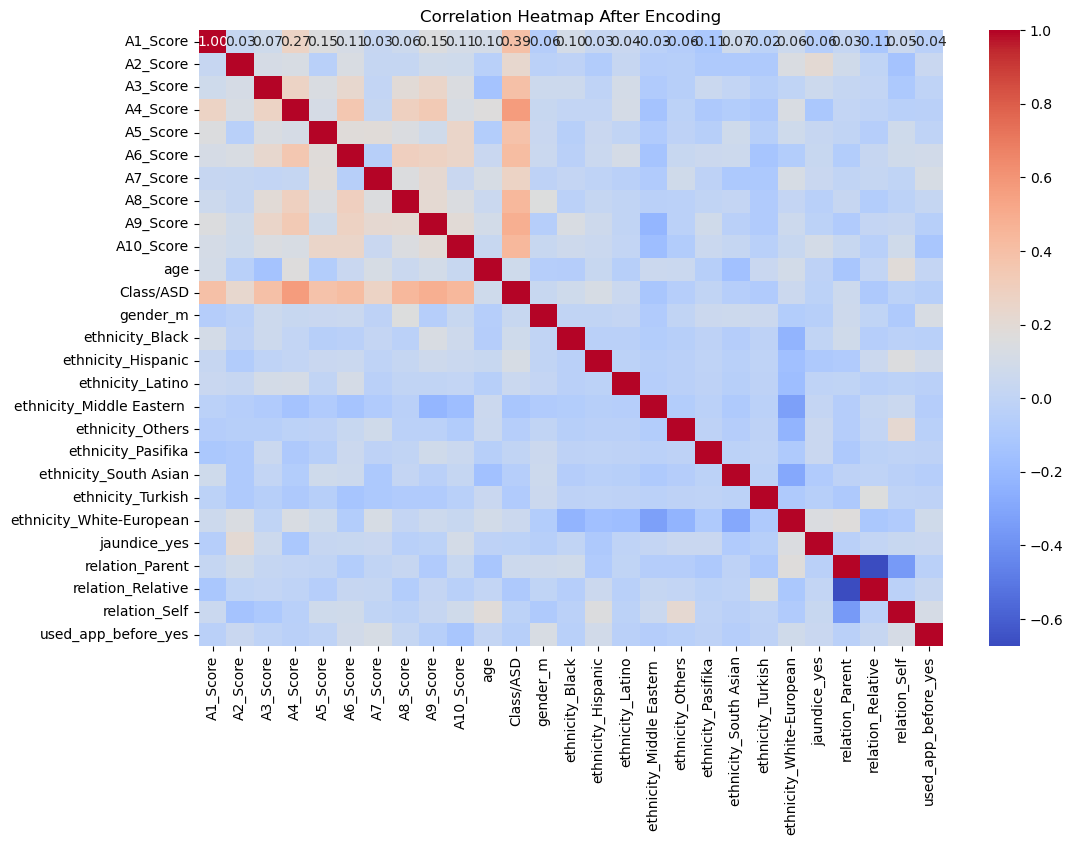

In [19]:
# Perform correlation analysis after one-hot encoding
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap After Encoding')
plt.show()


Visualize the current districution relations then say why this is neccesary

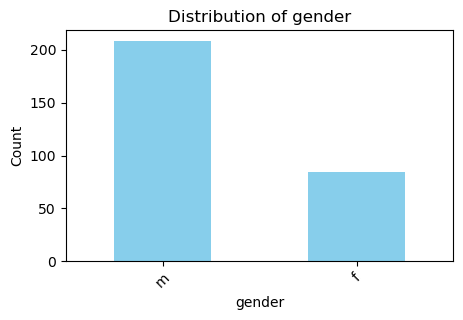

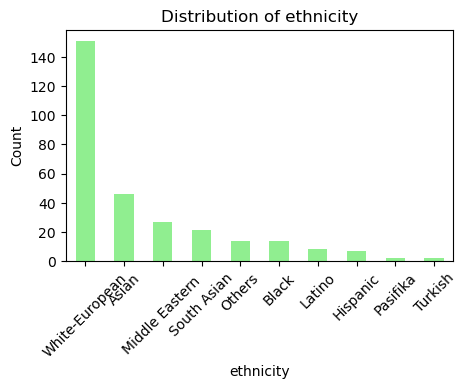

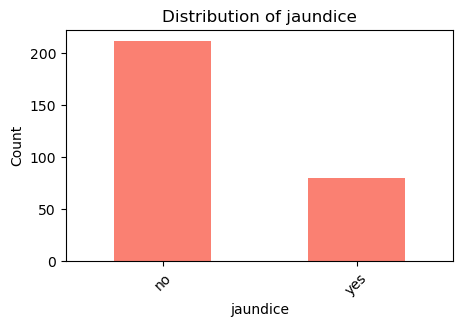

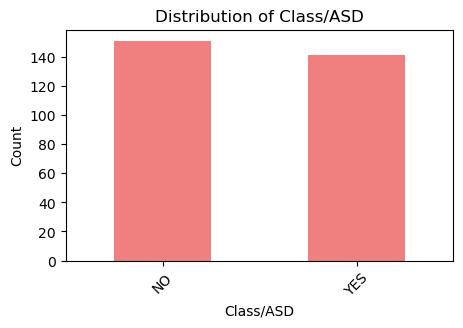

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Bar plot for categorical variables

categorical_columns = ['gender', 'ethnicity', 'jaundice', 'Class/ASD']
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'yellow']

for i, col in enumerate(categorical_columns):
    plt.figure(figsize=(5, 3))
    df[col].value_counts().plot(kind='bar', color=colors[i % len(colors)])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



Explain why we are using Z score to check for outliers and mention what other way can be used.

 # Data Preparation
 We start by feature engineering state what it is and why and how it can be used

In [21]:
# Check for outliers using Z-scores
z_scores = np.abs(stats.zscore(df[['age', 'result']]))
outliers = (z_scores > 3).all(axis=1) 
print("Number of outliers detected:", np.sum(outliers))

KeyError: "['result'] not in index"

Feature engineering explain what it is and why we are choosing this specific data and the importance

Explain why we can't choose country of res

Feature selection and say why they are being chosen

Say what it does and why these two-feature scaling

Handling imbalanced data we wont because they are almost balanced


## Logistic Regresion

In [43]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [22]:
# Build a baseline model
import statsmodels.api as sm

X_baseline = df_encoded[['A10_Score']]
y_baseline = df_encoded['Class/ASD']

# Add a constant (intercept) to the independent value
X_baseline = sm.add_constant(X_baseline)

# Fit the model
baseline_model = sm.Logit(y_baseline, X_baseline).fit()

# Print the summary of the model
print(baseline_model.summary())

Optimization terminated successfully.
         Current function value: 0.689728
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Class/ASD   No. Observations:                  292
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Sep 2024   Pseudo R-squ.:                0.004089
Time:                        05:32:15   Log-Likelihood:                -201.40
converged:                       True   LL-Null:                       -202.23
Covariance Type:            nonrobust   LLR p-value:                    0.1984
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4772      0.340     -1.406      0.160      -1.143       0.188
age            0.0643      0.

In [24]:
# Drop the A10_Score and Class/ASD columns
X = df_encoded.drop(['A10_Score', 'Class/ASD'], axis=1)
y = df_encoded['Class/ASD']

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Logistic Regression Model**
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Model:
Accuracy: 0.9322033898305084
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.86      0.95      0.90        20

    accuracy                           0.93        59
   macro avg       0.92      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59

Confusion Matrix:
 [[36  3]
 [ 1 19]]


In [36]:
# Define the feature and target variable
X_baseline_dt = df_encoded[['A10_Score']]
y_baseline_dt = df_encoded['Class/ASD']

# Initialize the Decision Tree model
baseline_decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model
baseline_decision_tree.fit(X_baseline_dt, y_baseline_dt)

# Predict using the same data
y_pred_dt = baseline_decision_tree.predict(X_baseline_dt)

In [42]:
# Decision Tree
print("\nTraining Decision Tree...")
dtree = models['Decision Tree']
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))





Training Decision Tree...

Decision Tree Evaluation:

Confusion Matrix:
 [[33  6]
 [ 2 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.75      0.90      0.82        20

    accuracy                           0.86        59
   macro avg       0.85      0.87      0.86        59
weighted avg       0.88      0.86      0.87        59

Accuracy Score: 0.864406779661017
ROC AUC Score: 0.873076923076923


In [45]:
 #Define the feature and target variable
X_baseline_rf = df_encoded[['A10_Score']]
y_baseline_rf = df_encoded['Class/ASD']

# Initialize the Random Forest model
baseline_random_forest = RandomForestClassifier(random_state=42)

# Fit the model
baseline_random_forest.fit(X_baseline_rf, y_baseline_rf)

# Predict using the same data
y_pred_rf = baseline_random_forest.predict(X_baseline_rf)

In [46]:
# Random Forest
print("\nTraining Random Forest...")
rf = models['Random Forest']
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))




Training Random Forest...

Random Forest Evaluation:

Confusion Matrix:
 [[35  4]
 [ 1 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        39
           1       0.83      0.95      0.88        20

    accuracy                           0.92        59
   macro avg       0.90      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59

Accuracy Score: 0.9152542372881356
ROC AUC Score: 0.9237179487179488


In [53]:
# Compare and save the best model
results = {
    'Logistic Regression': {
        'Confusion Matrix': confusion_matrix(y_test, y_pred_log),
        'Classification Report': classification_report(y_test, y_pred_log),
        'Accuracy Score': accuracy_score(y_test, y_pred_log),
        'ROC AUC Score': roc_auc_score(y_test, y_pred_log)
    },
    'Decision Tree': {
        'Confusion Matrix': confusion_matrix(y_test, y_pred_dt),
        'Classification Report': classification_report(y_test, y_pred_dt),
        'Accuracy Score': accuracy_score(y_test, y_pred_dt),
        'ROC AUC Score': roc_auc_score(y_test, y_pred_dt)
    },
    'Random Forest': {
        'Confusion Matrix': confusion_matrix(y_test, y_pred_rf),
        'Classification Report': classification_report(y_test, y_pred_rf),
        'Accuracy Score': accuracy_score(y_test, y_pred_rf),
        'ROC AUC Score': roc_auc_score(y_test, y_pred_rf)
    }
}

best_model_name = max(results, key=lambda k: results[k]['ROC AUC Score'])
print(f"\nBest Model: {best_model_name}\n")
print(results[best_model_name])

# Save the best model
import joblib
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")


Best Model: Logistic Regression

{'Confusion Matrix': array([[36,  3],
       [ 1, 19]], dtype=int64), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.92      0.95        39\n           1       0.86      0.95      0.90        20\n\n    accuracy                           0.93        59\n   macro avg       0.92      0.94      0.93        59\nweighted avg       0.94      0.93      0.93        59\n', 'Accuracy Score': 0.9322033898305084, 'ROC AUC Score': 0.9365384615384615}
Best model saved as 'best_model.pkl'


Explain why


In [56]:
#cross validation
# Cross-Validation
cv_scores = cross_val_score(log_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy Score: {cv_scores.mean()}")

Cross-Validation Accuracy Scores: [0.94915254 0.93220339 0.93103448 0.89655172 0.93103448]
Mean Cross-Validation Accuracy Score: 0.9279953243717124


elaborate

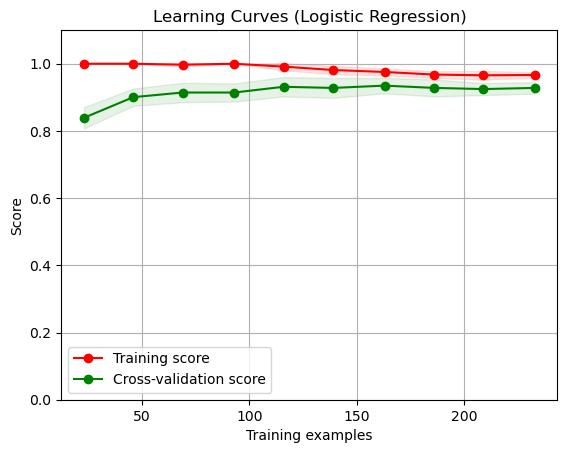

In [59]:
from sklearn.model_selection import learning_curve
# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    log_model, X_scaled, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure()
plt.title("Learning Curves (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()